# Counting Sort 

Explanation of counting sort functionality and demonstration of their lineal magnitude order.

---
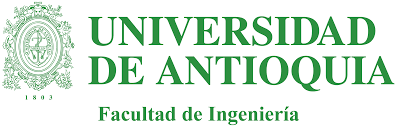

## Departamento de Ingeniería de Sistemas
### Estructuras de Datos
#### 2021-1

---
> Si no aceptas las consecuencias de tus elecciones, vivir será una tortura. 
##### *-Juan Cardona* 

## Introducing Counting Sort

### What is counting sort?

It is a sorting algorithm where all the input in the input $array$ are positive integers.

Counting sort assumes that each element in the input $array$ has a value ranging from $minValue$ to $maxValue$.

- $array$
- $minValue$
- $maxValue$



In [195]:
import numpy.random as rdm

# create one random input array
arr = list(rdm.randint(19,size = 7)) 

# get the minimum value in the input array 
minValue = min(arr)

# get the maximum value in the input array
maxValue = max(arr) 

print('array = '+str(arr))
print('minValue = '+ str(minValue))
print('maxValue = '+ str(maxValue))
# print('---this cell runs 3n times')

array = [14, 6, 4, 9, 13, 5, 6]
minValue = 4
maxValue = 14


### Functionality

Counting sorts is a special sorting algorithm that runs in linear time

* $O(n+k)$

with respect to two variables:

1. The length of the input $array$

- $n = length(array)$

2. The distance betwen the $minValue$ and the $maxValue$

- $k = maxValue - minValue + 1$

In [196]:
# get the length of the input array
n = len(arr) 

# get the distance between the minValue and the maxValue
k = maxValue - minValue + 1 

print('n = '+str(n))
print('k = '+ str(k))
# print('---this cell runs n+1 times')

n = 7
k = 11


For each element in the $array$, counting sort map it as the index of the $temporal$ array and increasing in 1 the corresponding value.
- $temporal=[0,0,0, \dots, k]$

In [197]:
# create the temporal array
temporal = [0]*k 

# fill the temporal array with the occurrences of each value in the input array
for value in arr:
    temporal[value - minValue]+=1  

print('temporal = ' +str(temporal))
# print('---this cell runs k+n times')
print(sum(temporal)==n)

temporal = [1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1]
True


Finally counting sort use the $temporal$ array to place the element directly into the correct slot in the $solution$ array.

- $solution=[0,0,0, \dots, n]$

In [198]:
# create the soution array
solution = []

# fill the solution array with the index on the temporal array if the value in it, it's different to 0
for i in range(len(temporal)):
    while temporal[i]>0:
        solution.append(i+minValue)
        temporal[i]-=1

print('solution = '+ str(solution))  

# print('---this cell runs 1+k+n times')

solution = [4, 5, 6, 6, 9, 13, 14]



## $O(n+k)$
### Demonstration of the magnitude order

First I'll get all the times that each cell was executed and then I'll define the magnitud order function for the code i wrote. 

### Cell 1 iterations $\sum_{i=1}^{n} 1 +\sum_{i=1}^{n} 1 +\sum_{i=1}^{n} 1 = 3n$
### Cell 2 iterations $(\sum_{i=1}^{n} 1 )+ 1 = n +1$
### Cell 3 iterations $\sum_{i=1}^{k} 1 + \sum_{i=1}^{n} 1 = k+n$
### Cell 4 iterations $1 + \sum_{i=1}^{k} 1+ \sum_{i=1}^{n} 1 = 1+k+n$

$O(n+k) = \sum_{i=1}^{n} 1 +\sum_{i=1}^{n} 1 +\sum_{i=1}^{n} 1 + (\sum_{i=1}^{n} 1 )+ 1 + \sum_{i=1}^{k} 1 + (\sum_{i=1}^{n} 1) + 1 + \sum_{i=1}^{k} 1+ \sum_{i=1}^{n} 1 $

$O(n+k) = 3n+n+1+k+n+1+k+n $

$O(n+k) = 6n+2k+2$

Now I want to create an array with points in the form $(n+k, O(n+k))$, with a random $k$ and the same $n$, so i define the next function to create those points and graph all of them.

In [209]:
def getRandomGraph(points):
    import numpy.random as rdm
    import random
    import matplotlib.pyplot as plt

    # create the n+k array
    kn = []

    # create the O(n+k) array
    Okn = []

    # fill the kn and Okn arrays
    for _ in range(points):
        arr = list(rdm.randint(random.randint(7, 19) ,size = 7))
        n = len(arr)
        maxValue = max(arr)
        minValue = min(arr) 
        k = maxValue - minValue + 1
        kn.append(n+k)
        Okn.append(6*n+2*k+2)

    # plot the kn and Okn arrays
    plt.plot(kn, Okn, 'o-')
    plt.title('Time of execution')
    plt.ylabel('O(k+n)')
    plt.xlabel('k+n')

    plt.show()

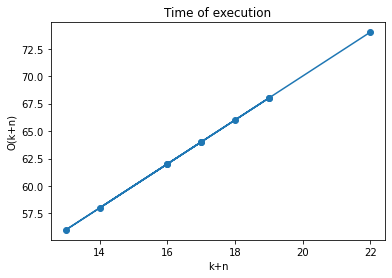

In [211]:
getRandomGraph(10)